# Steps -

### 1. Dealing with each feature one by one
### 2. See the distribution (from histogram) and use { .describe() }
### 3. Fill the missing values with mean , median , mode (Depends on distribution) also see inter-quartile ranges
### 4. Create dummy variable for categorical data
### 5. Scale the data
### 6.Train different models
### 7. Combine the best models then predict

In [1]:
import pandas as pd
import numpy as np
import random

df=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df.head()

,tracking_id,datetime,wind_speed,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,...,windmill_body_temperature,wind_direction,resistance,rotor_torque,turbine_status,cloud_level,blade_length,blade_breadth,windmill_height,windmill_generated_power
0,WM_33725,04-08-2019 14:33,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,05-11-2018 10:13,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,14-09-2019 14:03,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,25-12-2018 15:33,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,04-05-2019 03:13,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074


<AxesSubplot:>

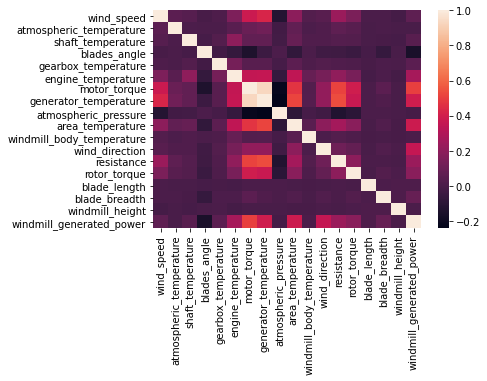

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns

corr=df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tracking_id                28200 non-null  object 
 1   datetime                   28200 non-null  object 
 2   wind_speed                 27927 non-null  float64
 3   atmospheric_temperature    24750 non-null  float64
 4   shaft_temperature          28198 non-null  float64
 5   blades_angle               27984 non-null  float64
 6   gearbox_temperature        28199 non-null  float64
 7   engine_temperature         28188 non-null  float64
 8   motor_torque               28176 non-null  float64
 9   generator_temperature      28188 non-null  float64
 10  atmospheric_pressure       25493 non-null  float64
 11  area_temperature           28200 non-null  float64
 12  windmill_body_temperature  25837 non-null  float64
 13  wind_direction             23097 non-null  flo

In [4]:
df.isnull().sum()

tracking_id                     0
datetime                        0
wind_speed                    273
atmospheric_temperature      3450
shaft_temperature               2
blades_angle                  216
gearbox_temperature             1
engine_temperature             12
motor_torque                   24
generator_temperature          12
atmospheric_pressure         2707
area_temperature                0
windmill_body_temperature    2363
wind_direction               5103
resistance                      1
rotor_torque                  572
turbine_status               1759
cloud_level                   276
blade_length                 5093
blade_breadth                   0
windmill_height               543
windmill_generated_power      207
dtype: int64

In [5]:
df_test.isnull().sum()

tracking_id                     0
datetime                        0
wind_speed                    126
atmospheric_temperature      1427
shaft_temperature               1
blades_angle                  106
gearbox_temperature             1
engine_temperature              5
motor_torque                   11
generator_temperature           5
atmospheric_pressure         1151
area_temperature                1
windmill_body_temperature     926
wind_direction               2160
resistance                      0
rotor_torque                  281
turbine_status                797
cloud_level                   125
blade_length                 2114
blade_breadth                   0
windmill_height               255
dtype: int64

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

### wind_speed(m/s)

(array([   26.,  1488., 24551.,  1810.,    52.]),
 array([-496.2110289 , -276.67768904,  -57.14434918,  162.38899068,
         381.92233054,  601.4556704 ]),
 <BarContainer object of 5 artists>)

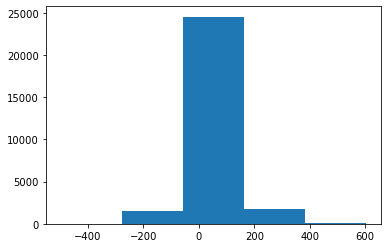

In [7]:
plt.hist(df['wind_speed'],bins=5)

In [8]:
df['wind_speed'].describe()

count    27927.000000
mean        69.037071
std         76.275645
min       -496.211029
25%         20.883502
50%         93.302129
75%         95.268058
max        601.455670
Name: wind_speed, dtype: float64

In [9]:
df['wind_speed']=abs(df['wind_speed'])
df_test['wind_speed']=abs(df_test['wind_speed'])

In [10]:
df['wind_speed'].fillna(df['wind_speed'].median(),inplace=True)
df_test['wind_speed'].fillna(df['wind_speed'].median(),inplace=True)

In [11]:
df[df['wind_speed']>300].tracking_id.count()

268

In [12]:
df.loc[(df.wind_speed > 300  ),'wind_speed']=300
df_test.loc[(df.wind_speed > 300),'wind_speed']=300

### atmospheric_temperature

(array([3.9420e+03, 0.0000e+00, 1.0000e+00, 3.0000e+00, 1.5600e+02,
        2.4030e+03, 1.3739e+04, 4.1660e+03, 3.2100e+02, 1.9000e+01]),
 array([-99.        , -81.07825565, -63.1565113 , -45.23476694,
        -27.31302259,  -9.39127824,   8.53046611,  26.45221046,
         44.37395482,  62.29569917,  80.21744352]),
 <BarContainer object of 10 artists>)

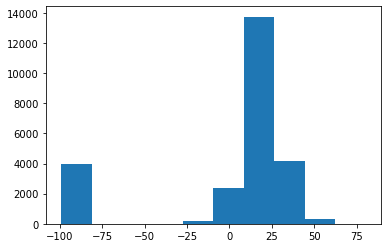

In [13]:
plt.hist(df['atmospheric_temperature'],bins=10)

In [14]:
df['atmospheric_temperature']=abs(df['atmospheric_temperature'])
df_test['atmospheric_temperature']=abs(df_test['atmospheric_temperature'])

In [15]:
df.loc[(df.atmospheric_temperature > 60),'atmospheric_temperature']=random.randint(7,30)
df_test.loc[(df.atmospheric_temperature > 60),'atmospheric_temperature']=random.randint(7,30)

In [16]:
df['atmospheric_temperature'].mean()

17.446773044369

(array([1160., 7613., 5243., 4740., 3148., 1682.,  701.,  287.,  137.,
          39.]),
 array([8.78262900e-03, 6.00330061e+00, 1.19978186e+01, 1.79923366e+01,
        2.39868545e+01, 2.99813725e+01, 3.59758905e+01, 4.19704085e+01,
        4.79649264e+01, 5.39594444e+01, 5.99539624e+01]),
 <BarContainer object of 10 artists>)

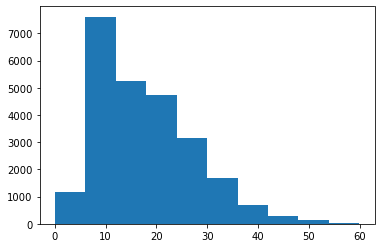

In [17]:
plt.hist(df['atmospheric_temperature'],bins=10)

In [18]:
df['atmospheric_temperature'].fillna(df['atmospheric_temperature'].mean(),inplace=True)
df_test['atmospheric_temperature'].fillna(df['atmospheric_temperature'].mean(),inplace=True)

### shaft_temperature

(array([  587.,  1369., 23460.,  2704.,    78.]),
 array([-99.        , -45.23590898,   8.52818204,  62.29227306,
        116.05636408, 169.8204551 ]),
 <BarContainer object of 5 artists>)

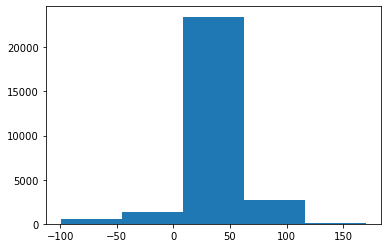

In [19]:
plt.hist(df['shaft_temperature'],bins=5)

In [20]:
df['shaft_temperature']=abs(df['shaft_temperature'])
df_test['shaft_temperature']=abs(df_test['shaft_temperature'])

(array([3.7480e+03, 2.1672e+04, 2.6200e+03, 1.4800e+02, 1.0000e+01]),
 array([2.65869120e-02, 3.39853605e+01, 6.79441342e+01, 1.01902908e+02,
        1.35861681e+02, 1.69820455e+02]),
 <BarContainer object of 5 artists>)

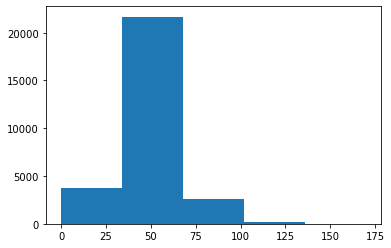

In [21]:
plt.hist(df['shaft_temperature'],bins=5)

In [22]:
df.loc[(df.shaft_temperature > 80),'shaft_temperature']=random.randint(30,50)
df_test.loc[(df.shaft_temperature > 80),'shaft_temperature']=random.randint(30,50)

In [23]:
df['shaft_temperature'].mean()

41.42035336362746

In [24]:
df['shaft_temperature'].fillna(df['shaft_temperature'].mean(),inplace=True)
df_test['shaft_temperature'].fillna(df['shaft_temperature'].mean(),inplace=True)

### blades_angle

(array([2.0000e+00, 5.1510e+03, 1.8600e+02, 2.4000e+01, 1.7159e+04,
        2.8610e+03, 1.5060e+03, 9.9000e+02, 9.0000e+01, 1.5000e+01]),
 array([-146.2595427 , -115.04037611,  -83.82120952,  -52.60204293,
         -21.38287634,    9.83629025,   41.05545684,   72.27462343,
         103.49379002,  134.71295661,  165.9321232 ]),
 <BarContainer object of 10 artists>)

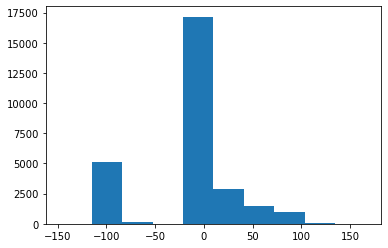

In [25]:
plt.hist(df['blades_angle'],bins=10)

In [26]:
df['blades_angle']=abs(df['blades_angle'])
df_test['blades_angle']=abs(df_test['blades_angle'])

(array([1.8564e+04, 6.7000e+02, 1.6140e+03, 4.5400e+02, 7.3100e+02,
        5.7320e+03, 1.9400e+02, 8.0000e+00, 1.0000e+01, 7.0000e+00]),
 array([  0.        ,  16.59321232,  33.18642464,  49.77963696,
         66.37284928,  82.9660616 ,  99.55927392, 116.15248624,
        132.74569856, 149.33891088, 165.9321232 ]),
 <BarContainer object of 10 artists>)

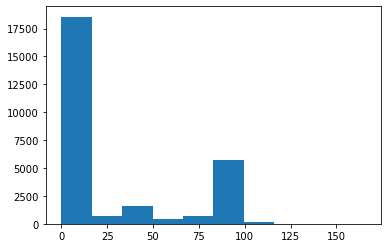

In [27]:
plt.hist(df['blades_angle'],bins=10)

In [28]:
df['blades_angle'].describe()

count    27984.000000
mean        28.450640
std         39.747781
min          0.000000
25%          1.021088
50%          1.896679
75%         53.480830
max        165.932123
Name: blades_angle, dtype: float64

In [29]:
df.loc[(df.blades_angle > 90),'blades_angle']=random.randint(0,50)
df_test.loc[(df.blades_angle > 90),'blades_angle']=random.randint(0,50)

In [30]:
df['blades_angle'].fillna(df['blades_angle'].mean(),inplace=True)
df_test['blades_angle'].fillna(df['blades_angle'].mean(),inplace=True)

### gearbox_temperature

(array([3.3110e+03, 2.4869e+04, 1.6000e+01, 0.0000e+00, 3.0000e+00]),
 array([-244.9740978 ,    3.82072176,  252.61554132,  501.41036088,
         750.20518044,  999.        ]),
 <BarContainer object of 5 artists>)

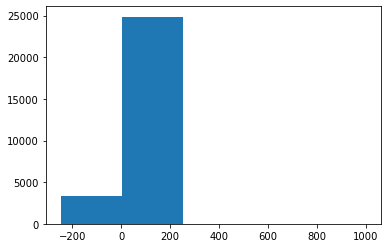

In [31]:
plt.hist(df['gearbox_temperature'],bins=5)

In [32]:
df['gearbox_temperature'].describe()

count    28199.000000
mean        41.027755
std         43.663605
min       -244.974098
25%         40.557952
50%         43.221735
75%         45.879425
max        999.000000
Name: gearbox_temperature, dtype: float64

In [33]:
df['gearbox_temperature']=abs(df['gearbox_temperature'])
df_test['gearbox_temperature']=abs(df_test['gearbox_temperature'])

In [34]:
df.loc[(df.gearbox_temperature > 120),'gearbox_temperature']=random.randint(0,50)
df_test.loc[(df.gearbox_temperature > 120),'gearbox_temperature']=random.randint(0,50)

In [35]:
df['gearbox_temperature'].fillna(df['gearbox_temperature'].mean(),inplace=True)
df_test['gearbox_temperature'].fillna(df['gearbox_temperature'].mean(),inplace=True)

### engine_temperature

(array([  330.,   719.,     0.,  1921., 25218.]),
 array([ 3.16715102, 12.53372082, 21.90029061, 31.26686041, 40.6334302 ,
        50.        ]),
 <BarContainer object of 5 artists>)

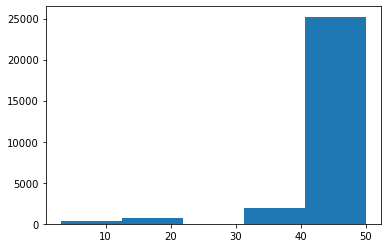

In [36]:
plt.hist(df['engine_temperature'],bins=5)

In [37]:
df['engine_temperature'].describe()

count    28188.000000
mean        42.614239
std          6.124546
min          3.167151
25%         41.911365
50%         43.525297
75%         45.174246
max         50.000000
Name: engine_temperature, dtype: float64

In [38]:
df['engine_temperature']=abs(df['engine_temperature'])
df_test['engine_temperature']=abs(df_test['engine_temperature'])

In [39]:
df['engine_temperature'].fillna(df['engine_temperature'].mean(),inplace=True)
df_test['engine_temperature'].fillna(df['engine_temperature'].mean(),inplace=True)

### motor_torque

(array([1646., 8303., 2610.,  296.,  436.,  533., 5273., 2357., 2598.,
        4124.]),
 array([ 500.,  750., 1000., 1250., 1500., 1750., 2000., 2250., 2500.,
        2750., 3000.]),
 <BarContainer object of 10 artists>)

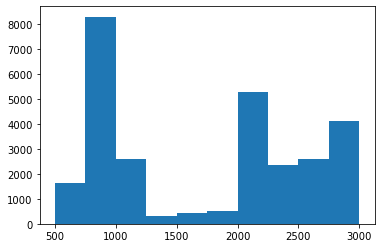

In [40]:
plt.hist(df['motor_torque'],bins=10)

In [41]:
df['motor_torque'].describe()

count    28176.000000
mean      1710.819803
std        827.205537
min        500.000000
25%        870.340239
50%       2031.849540
75%       2462.585729
max       3000.000000
Name: motor_torque, dtype: float64

In [42]:
df['motor_torque'].fillna(df['motor_torque'].mean(),inplace=True)
df_test['motor_torque'].fillna(df['motor_torque'].mean(),inplace=True)

### generator_temperature

(array([9479.,  485., 7174., 6548., 4502.]),
 array([ 33.89377879,  47.11502303,  60.33626727,  73.55751152,
         86.77875576, 100.        ]),
 <BarContainer object of 5 artists>)

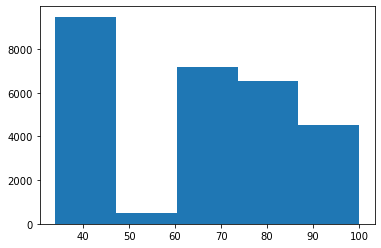

In [43]:
plt.hist(df['generator_temperature'],bins=5)

In [44]:
df['generator_temperature'].describe()

count    28188.000000
mean        65.027857
std         19.816499
min         33.893779
25%         41.198509
50%         70.729533
75%         78.945849
max        100.000000
Name: generator_temperature, dtype: float64

In [45]:
df['generator_temperature'].fillna(df['generator_temperature'].mean(),inplace=True)
df_test['generator_temperature'].fillna(df['generator_temperature'].mean(),inplace=True)

### atmospheric_pressure

(array([   55.,  1911., 21349.,  2100.,    78.]),
 array([-1188624.131 ,  -696388.9258,  -204153.7206,   288081.4846,
          780316.6898,  1272551.895 ]),
 <BarContainer object of 5 artists>)

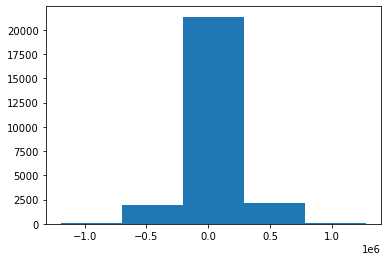

In [46]:
plt.hist(df['atmospheric_pressure'],bins=5)

In [47]:
df['atmospheric_pressure']=abs(df['atmospheric_pressure'])
df_test['atmospheric_pressure']=abs(df_test['atmospheric_pressure'])

In [48]:
df['atmospheric_pressure'].describe()

count    2.549300e+04
mean     1.226744e+05
std      1.514489e+05
min      2.109124e+02
25%      1.730865e+04
50%      1.043500e+05
75%      1.358935e+05
max      1.272552e+06
Name: atmospheric_pressure, dtype: float64

In [49]:
df['atmospheric_pressure'].fillna(df['atmospheric_pressure'].mean(),inplace=True)
df_test['atmospheric_pressure'].fillna(df['atmospheric_pressure'].mean(),inplace=True)

### area_temperature

(array([3.4000e+01, 1.5000e+01, 1.1240e+03, 1.9726e+04, 7.3010e+03]),
 array([-30., -13.,   4.,  21.,  38.,  55.]),
 <BarContainer object of 5 artists>)

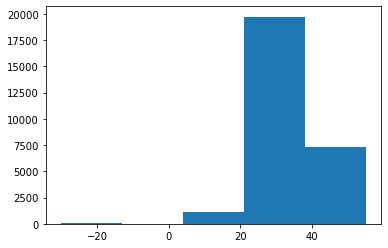

In [50]:
plt.hist(df['area_temperature'],bins=5)

In [51]:
df['area_temperature'].describe()

count    28200.000000
mean        32.735091
std          7.703391
min        -30.000000
25%         27.311644
50%         32.605195
75%         38.232387
max         55.000000
Name: area_temperature, dtype: float64

In [52]:
df['area_temperature']=abs(df['area_temperature'])
df_test['area_temperature']=abs(df_test['area_temperature'])

In [53]:
df['area_temperature'].fillna(df['area_temperature'].mean(),inplace=True)
df_test['area_temperature'].fillna(df['area_temperature'].mean(),inplace=True)

### windmill_body_temperature

(array([3.0000e+00, 0.0000e+00, 0.0000e+00, 2.4644e+04, 1.1900e+03]),
 array([-999. , -734.6, -470.2, -205.8,   58.6,  323. ]),
 <BarContainer object of 5 artists>)

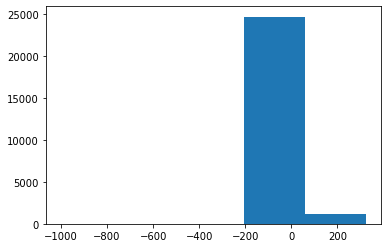

In [54]:
plt.hist(df['windmill_body_temperature'],bins=5)

In [55]:
df['windmill_body_temperature'].describe()

count    25837.000000
mean        20.799761
std         54.356431
min       -999.000000
25%         40.448386
50%         42.786832
75%         44.494543
max        323.000000
Name: windmill_body_temperature, dtype: float64

In [56]:
df.loc[(df.windmill_body_temperature > 55  ),'windmill_body_temperature']=random.randint(40,50)
df_test.loc[(df.windmill_body_temperature > 55),'windmill_body_temperature']=random.randint(40,50)

df.loc[(df.windmill_body_temperature < -30 ),'windmill_body_temperature']=-30
df_test.loc[(df.windmill_body_temperature < -30),'windmill_body_temperature']=-30

In [57]:
df['windmill_body_temperature'].fillna(42.786832,inplace=True)
df_test['windmill_body_temperature'].fillna(42.786832,inplace=True)

### wind_direction

(array([ 1597.,  2886., 11818.,  1556.,  5240.]),
 array([  0.        , 113.99329576, 227.98659152, 341.97988728,
        455.97318304, 569.9664788 ]),
 <BarContainer object of 5 artists>)

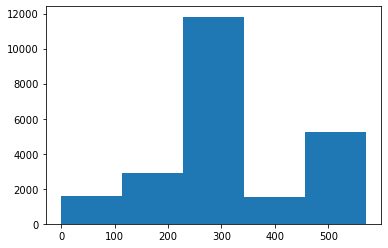

In [58]:
plt.hist(df['wind_direction'],bins=5)

In [59]:
df['wind_direction'].describe()

count    23097.000000
mean       306.888883
std        134.055900
min          0.000000
25%        238.627752
50%        271.427656
75%        404.153517
max        569.966479
Name: wind_direction, dtype: float64

In [60]:
df['wind_direction'].fillna(df['wind_direction'].mean(),inplace=True)
df_test['wind_direction'].fillna(df['wind_direction'].mean(),inplace=True)

### resistance

(array([  691.,  6505., 20039.,   943.,    21.]),
 array([-1005.222988 ,   134.5179962,  1274.2589804,  2413.9999646,
         3553.7409488,  4693.481933 ]),
 <BarContainer object of 5 artists>)

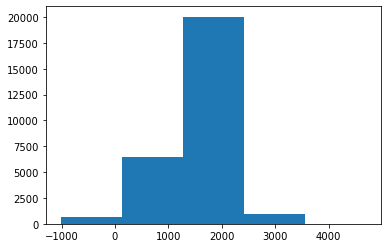

In [61]:
plt.hist(df['resistance'],bins=5)

In [62]:
df['resistance'].describe()

count    28199.000000
mean      1575.560011
std        483.326394
min      -1005.222988
25%       1268.134042
50%       1678.238404
75%       1829.054007
max       4693.481933
Name: resistance, dtype: float64

In [63]:
df['resistance']=abs(df['resistance'])
df_test['resistance']=abs(df_test['resistance'])

In [64]:
df['resistance'].fillna(df['resistance'].mean(),inplace=True)
df_test['resistance'].fillna(df['resistance'].mean(),inplace=True)

### rotor_torque

(array([  711.,  4634., 21370.,   887.,    26.]),
 array([-136.7322169 ,  -62.00912068,   12.71397554,   87.43707176,
         162.16016798,  236.8832642 ]),
 <BarContainer object of 5 artists>)

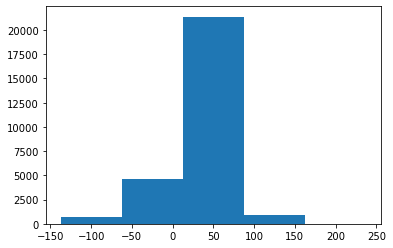

In [65]:
plt.hist(df['rotor_torque'],bins=5)

In [66]:
df['rotor_torque'].describe()

count    27628.000000
mean        25.849894
std         32.423943
min       -136.732217
25%         13.722808
50%         32.977192
75%         41.550520
max        236.883264
Name: rotor_torque, dtype: float64

In [67]:
df['rotor_torque']=abs(df['rotor_torque'])
df_test['rotor_torque']=abs(df_test['rotor_torque'])


In [68]:
df['rotor_torque'].fillna(df['rotor_torque'].median(),inplace=True)
df_test['rotor_torque'].fillna(df['rotor_torque'].median(),inplace=True)

In [69]:
df[df['rotor_torque']>100].tracking_id.count()

529

In [70]:
df.loc[(df.rotor_torque > 100  ),'rotor_torque']=random.randint(80,100)
df_test.loc[(df.rotor_torque > 100),'rotor_torque']=random.randint(80,100)

### blade_length

(array([  275.,     0.,     0.,    27., 22805.]),
 array([-99.        , -75.55803997, -52.11607994, -28.67411992,
         -5.23215989,  18.20980014]),
 <BarContainer object of 5 artists>)

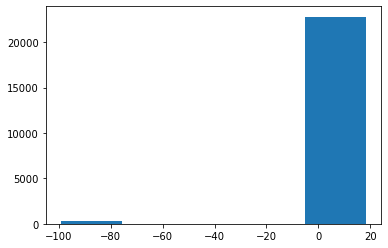

In [71]:
plt.hist(df['blade_length'],bins=5)

In [72]:
df['blade_length']=abs(df['blade_length'])
df_test['blade_length']=abs(df_test['blade_length'])

In [73]:
df['blade_length'].describe()

count    23107.000000
mean         4.757761
std         10.468181
min          0.000569
25%          2.607250
50%          3.506035
75%          4.409620
max         99.000000
Name: blade_length, dtype: float64

In [74]:
df[df['blade_length']>7].tracking_id.count()

1405

In [75]:
df.loc[(df.blade_length > 7  ),'blade_length']=7
df_test.loc[(df.blade_length > 7),'blade_length']=7

In [76]:
df['blade_length'].fillna(df['blade_length'].mean(),inplace=True)
df_test['blade_length'].fillna(df['blade_length'].mean(),inplace=True)

### blade_breadth

(array([ 345., 3033., 8161., 8288., 8373.]),
 array([0.200111  , 0.26008385, 0.32005671, 0.38002956, 0.44000241,
        0.49997527]),
 <BarContainer object of 5 artists>)

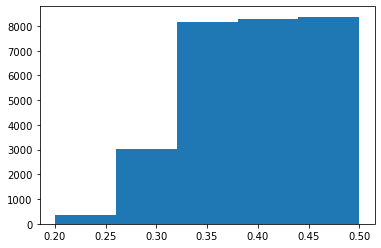

In [77]:
plt.hist(df['blade_breadth'],bins=5)

In [78]:
df['blade_breadth'].describe()

count    28200.000000
mean         0.397249
std          0.061158
min          0.200111
25%          0.347445
50%          0.398591
75%          0.449354
max          0.499975
Name: blade_breadth, dtype: float64

In [79]:
df['blade_breadth'].fillna(df['blade_breadth'].mean(),inplace=True)
df_test['blade_breadth'].fillna(df['blade_breadth'].mean(),inplace=True)

### windmill_height

(array([   56.,  1622., 23485.,  2435.,    59.]),
 array([-30.29525292,  -8.56593528,  13.16338236,  34.8927    ,
         56.62201764,  78.35133528]),
 <BarContainer object of 5 artists>)

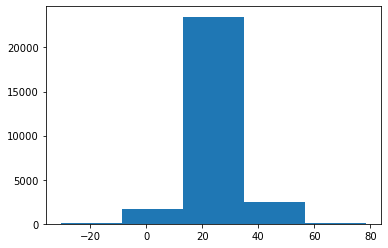

In [80]:
plt.hist(df['windmill_height'],bins=5)

In [81]:
df['windmill_height'].describe()

count    27657.000000
mean        25.887052
std          7.773609
min        -30.295253
25%         24.447658
50%         25.957739
75%         27.477854
max         78.351335
Name: windmill_height, dtype: float64

In [82]:
df['windmill_height']=abs(df['windmill_height'])
df_test['windmill_height']=abs(df_test['windmill_height'])

In [83]:
df[df['windmill_height']>50].tracking_id.count()

168

In [84]:
df.loc[(df.windmill_height > 50  ),'windmill_height']=50
df_test.loc[(df.windmill_height > 50),'windmill_height']=50

In [85]:
df['windmill_height'].fillna(df['windmill_height'].mean(),inplace=True)
df_test['windmill_height'].fillna(df['windmill_height'].mean(),inplace=True)

### turbine_status

<AxesSubplot:xlabel='turbine_status', ylabel='count'>

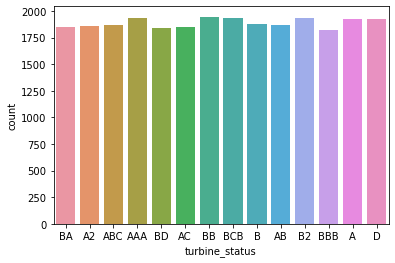

In [86]:
sns.countplot(x="turbine_status", data=df)

In [87]:
df['turbine_status'].unique()

array(['BA', 'A2', 'ABC', 'AAA', 'BD', 'AC', 'BB', 'BCB', 'B', 'AB', nan,
       'B2', 'BBB', 'A', 'D'], dtype=object)

In [88]:
df['turbine_status'].fillna(df['turbine_status'].mode(),inplace=True)
df_test['turbine_status'].fillna(df['turbine_status'].mode(),inplace=True)

### cloud_level

<AxesSubplot:xlabel='cloud_level', ylabel='count'>

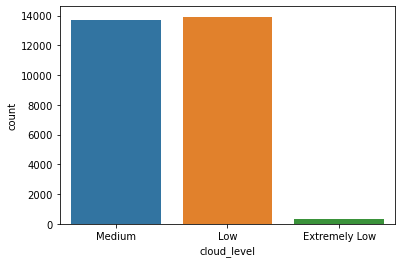

In [89]:
sns.countplot(x="cloud_level", data=df)

In [90]:
df['cloud_level'].unique()

array(['Medium', nan, 'Low', 'Extremely Low'], dtype=object)

In [91]:
df['cloud_level'].fillna(df['cloud_level'].mode(),inplace=True)
df_test['cloud_level'].fillna(df['cloud_level'].mode(),inplace=True)

In [92]:
dummies_train_cost  = pd.get_dummies(df['cloud_level'])
dummies_train_cost.drop(['Extremely Low'],axis=1,inplace=True)

dummies_test_cost  = pd.get_dummies(df_test['cloud_level'])
dummies_test_cost.drop(['Extremely Low'],axis=1,inplace=True)

df = df.join(dummies_train_cost)
df_test = df_test.join(dummies_test_cost)

df_test.drop(['cloud_level'],axis=1,inplace=True)
df.drop(['cloud_level'],axis=1,inplace=True)


### windmill_generated_power

(array([ 9908., 13035.,  4459.,   550.,    41.]),
 array([ 0.96230495,  4.80491554,  8.64752614, 12.49013673, 16.33274733,
        20.17535792]),
 <BarContainer object of 5 artists>)

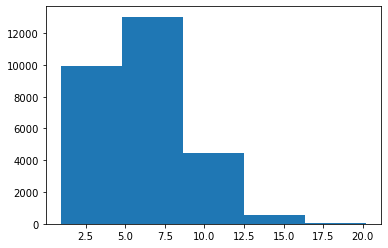

In [93]:
plt.hist(df['windmill_generated_power'],bins=5)

In [94]:
df['windmill_generated_power'].describe()

count    27993.000000
mean         6.130529
std          2.697520
min          0.962305
25%          4.059505
50%          5.764710
75%          7.947195
max         20.175358
Name: windmill_generated_power, dtype: float64

In [95]:
df['windmill_generated_power'].fillna(df['windmill_generated_power'].mean(),inplace=True)


In [96]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12086 entries, 0 to 12085
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tracking_id                12086 non-null  object 
 1   datetime                   12086 non-null  object 
 2   wind_speed                 12086 non-null  float64
 3   atmospheric_temperature    12086 non-null  float64
 4   shaft_temperature          12086 non-null  float64
 5   blades_angle               12086 non-null  float64
 6   gearbox_temperature        12086 non-null  float64
 7   engine_temperature         12086 non-null  float64
 8   motor_torque               12086 non-null  float64
 9   generator_temperature      12086 non-null  float64
 10  atmospheric_pressure       12086 non-null  float64
 11  area_temperature           12086 non-null  float64
 12  windmill_body_temperature  12086 non-null  float64
 13  wind_direction             12086 non-null  flo

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tracking_id                28200 non-null  object 
 1   datetime                   28200 non-null  object 
 2   wind_speed                 28200 non-null  float64
 3   atmospheric_temperature    28200 non-null  float64
 4   shaft_temperature          28200 non-null  float64
 5   blades_angle               28200 non-null  float64
 6   gearbox_temperature        28200 non-null  float64
 7   engine_temperature         28200 non-null  float64
 8   motor_torque               28200 non-null  float64
 9   generator_temperature      28200 non-null  float64
 10  atmospheric_pressure       28200 non-null  float64
 11  area_temperature           28200 non-null  float64
 12  windmill_body_temperature  28200 non-null  float64
 13  wind_direction             28200 non-null  flo

In [98]:
df.head()

,tracking_id,datetime,wind_speed,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,...,wind_direction,resistance,rotor_torque,turbine_status,blade_length,blade_breadth,windmill_height,windmill_generated_power,Low,Medium
0,WM_33725,04-08-2019 14:33,94.820023,7.000000,41.723019,0.903423,82.410573,42.523015,2563.124522,76.665560,...,239.836388,2730.310605,42.084666,BA,2.217542,0.314065,24.281689,6.766521,0,1
1,WM_698,05-11-2018 10:13,241.832734,27.764785,44.000000,32.000000,44.104919,46.258870,2372.384119,78.129803,...,337.944723,1780.207200,89.000000,A2,4.210346,0.448494,27.262139,5.966275,0,1
2,WM_39146,14-09-2019 14:03,95.484724,17.446773,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,227.850294,1666.049900,42.931459,ABC,2.719475,0.302321,27.366127,2.874342,0,1
3,WM_6757,25-12-2018 15:33,238.819424,7.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,492.081520,1964.502895,42.744596,ABC,4.857385,0.367140,24.287767,14.851089,0,0
4,WM_21521,04-05-2019 03:13,10.722890,17.446773,41.981183,1.715696,17.616459,43.469852,781.695419,37.423065,...,259.274601,1177.516152,13.387289,AAA,3.590606,0.453374,27.971650,3.519074,0,1


In [99]:
train = df.drop( ['tracking_id','datetime','turbine_status'] ,axis=1)
test = df_test.drop( ['tracking_id','datetime','turbine_status'] ,axis=1)

### Scaling 

In [100]:
train['wind_speed']=(train['wind_speed']-train['wind_speed'].mean())/train['wind_speed'].std()
test['wind_speed']=(test['wind_speed']-test['wind_speed'].mean())/test['wind_speed'].std()

train['atmospheric_temperature']=(train['atmospheric_temperature']-train['atmospheric_temperature'].mean())/train['atmospheric_temperature'].std()
test['atmospheric_temperature']=(test['atmospheric_temperature']-test['atmospheric_temperature'].mean())/test['atmospheric_temperature'].std()

train['shaft_temperature']=(train['shaft_temperature']-train['shaft_temperature'].mean())/train['shaft_temperature'].std()
test['shaft_temperature']=(test['shaft_temperature']-test['shaft_temperature'].mean())/test['shaft_temperature'].std()

train['blades_angle']=(train['blades_angle']-train['blades_angle'].mean())/train['blades_angle'].std()
test['blades_angle']=(test['blades_angle']-test['blades_angle'].mean())/test['blades_angle'].std()

train['gearbox_temperature']=(train['gearbox_temperature']-train['gearbox_temperature'].mean())/train['gearbox_temperature'].std()
test['gearbox_temperature']=(test['gearbox_temperature']-test['gearbox_temperature'].mean())/test['gearbox_temperature'].std()

train['engine_temperature']=(train['engine_temperature']-train['engine_temperature'].mean())/train['engine_temperature'].std()
test['engine_temperature']=(test['engine_temperature']-test['engine_temperature'].mean())/test['engine_temperature'].std()

train['motor_torque']=(train['motor_torque']-train['motor_torque'].mean())/train['motor_torque'].std()
test['motor_torque']=(test['motor_torque']-test['motor_torque'].mean())/test['motor_torque'].std()

train['generator_temperature']=(train['generator_temperature']-train['generator_temperature'].mean())/train['generator_temperature'].std()
test['generator_temperature']=(test['generator_temperature']-test['generator_temperature'].mean())/test['generator_temperature'].std()

train['atmospheric_pressure']=(train['atmospheric_pressure']-train['atmospheric_pressure'].mean())/train['atmospheric_pressure'].std()
test['atmospheric_pressure']=(test['atmospheric_pressure']-test['atmospheric_pressure'].mean())/test['atmospheric_pressure'].std()

train['area_temperature']=(train['area_temperature']-train['area_temperature'].mean())/train['area_temperature'].std()
test['area_temperature']=(test['area_temperature']-test['area_temperature'].mean())/test['area_temperature'].std()

train['resistance']=(train['resistance']-train['resistance'].mean())/train['resistance'].std()
test['resistance']=(test['resistance']-test['resistance'].mean())/test['resistance'].std()

train['rotor_torque']=(train['rotor_torque']-train['rotor_torque'].mean())/train['rotor_torque'].std()
test['rotor_torque']=(test['rotor_torque']-test['rotor_torque'].mean())/test['rotor_torque'].std()

train['blade_length']=(train['blade_length']-train['blade_length'].mean())/train['blade_length'].std()
test['blade_length']=(test['blade_length']-test['blade_length'].mean())/test['blade_length'].std()

train['blade_breadth']=(train['blade_breadth']-train['blade_breadth'].mean())/train['blade_breadth'].std()
test['blade_breadth']=(test['blade_breadth']-test['blade_breadth'].mean())/test['blade_breadth'].std()

train['windmill_body_temperature']=(train['windmill_body_temperature']-train['windmill_body_temperature'].mean())/train['windmill_body_temperature'].std()
test['windmill_body_temperature']=(test['windmill_body_temperature']-test['windmill_body_temperature'].mean())/test['windmill_body_temperature'].std()

train['wind_direction']=(train['wind_direction']-train['wind_direction'].mean())/train['wind_direction'].std()
test['wind_direction']=(test['wind_direction']-test['wind_direction'].mean())/test['wind_direction'].std()

train['windmill_height']=(train['windmill_height']-train['windmill_height'].mean())/train['windmill_height'].std()
test['windmill_height']=(test['windmill_height']-test['windmill_height'].mean())/test['windmill_height'].std()



In [101]:
from sklearn.model_selection import train_test_split

X = train.drop(['windmill_generated_power'], axis = 1)
Y = train['windmill_generated_power']


In [102]:
x_train,x_test,y_train,y_test  = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [103]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(22560, 19) (22560,)
(5640, 19) (5640,)


In [104]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(x_train,y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.4533343304087304
0.4329003834071309


In [105]:
from sklearn.linear_model import RidgeCV
ridge_model = RidgeCV(scoring="r2",
                          alphas=[0.0001,0.0005,0.001,0.005,0.01,0.1,1.0,10],cv=5)
ridge_model.fit(x_train,y_train)
y_train_pred = ridge_model.predict(x_train)
y_test_pred = ridge_model.predict(x_test)
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.4533343295133767
0.43290059507876766


In [106]:
from sklearn.linear_model import LassoCV
lasso_model = LassoCV(alphas=[0.0001,0.0005,0.001,0.005,0.01,0.1,1.0,10],cv=5)
lasso_model.fit(x_train,y_train)
y_train_pred = lasso_model.predict(x_train)
y_test_pred = lasso_model.predict(x_test)
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))


0.4533258863900359
0.43292154083011414


In [107]:
from sklearn.linear_model import ElasticNetCV
enet_model = ElasticNetCV(l1_ratio = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
                    alphas = [1, 0.1, 0.01, 0.001, 0.0005], cv=5)
enet_model.fit(x_train, y_train)

# predict
y_train_pred = enet_model.predict(x_train)
y_test_pred = enet_model.predict(x_test)
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.4533258863900359
0.43292154083011414


In [108]:
from sklearn.ensemble import ExtraTreesRegressor
extra_model = ExtraTreesRegressor(criterion='mse', random_state=0, n_jobs=-1, 
                                min_samples_leaf=1, max_depth=20, 
                                min_samples_split=3, n_estimators=1000
                               )

extra_model.fit(x_train, y_train)

# predict
y_train_pred = extra_model.predict(x_train)
y_test_pred = extra_model.predict(x_test)
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.9977869346757341
0.9463917639871888


In [109]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.9937177014789261
0.94861377780776


In [110]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(criterion='mse',random_state=0,max_depth=5,
                                     n_estimators=500,min_samples_split=2,min_samples_leaf=2)
gb_model.fit(x_train,y_train)
y_train_pred = gb_model.predict(x_train)
y_test_pred = gb_model.predict(x_test)
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.9840346762884791
0.9449161319065051


In [111]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=500,max_depth=5,booster='gbtree',n_jobs=-1,learning_rate=0.1,reg_lambda=0.01,reg_alpha=0.3)
xgb.fit(x_train,y_train)
y_train_pred = xgb.predict(x_train)
y_test_pred = xgb.predict(x_test)
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.9856493125123108
0.9462095771719774


In [112]:
import sklearn.base as skb
class MixModel(skb.BaseEstimator,skb.RegressorMixin,skb.TransformerMixin):
    def __init__(self,algs):
        self.algs = algs
    def fit(self,X,y):
        self.algs_ = [skb.clone(x) for x in self.algs]
        for alg in self.algs_:
            alg.fit(X,y)
        return self
    def predict(self,X):
        predictions = np.column_stack([
            stacked_model.predict(X) for stacked_model in self.algs_
        ])
        return np.mean(predictions,axis=1)

In [113]:
mixed_model = MixModel(algs = [xgb,rf,gb_model])
mixed_model.fit(x_train, y_train)
y_train_pred = mixed_model.predict(x_train)
y_test_pred = mixed_model.predict(x_test)
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.9893485081571429
0.9495630547655074


In [114]:
df_sub = df_test[['tracking_id','datetime']]

In [115]:
results = mixed_model.predict(test)

In [116]:
results

array([2.72483407, 3.41499301, 3.4555845 , ..., 5.51339362, 5.02778245,
       9.68490887])

In [117]:
df_sub['windmill_generated_power(kW/h)'] = results

<ipython-input-117-b2c3b3e3f1a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['windmill_generated_power(kW/h)'] = results


In [118]:
df_sub.to_csv('sub1.csv',header=True,index=False)
df_sub

,tracking_id,datetime,windmill_generated_power(kW/h)
0,WM_19817,17-04-2019 08:53,2.724834
1,WM_18723,30-03-2019 07:43,3.414993
2,WM_34552,10-08-2019 11:33,3.455584
3,WM_28570,26-06-2019 03:53,5.703127
4,WM_36934,27-08-2019 16:43,3.521737
...,...,...,...
12081,WM_13376,12-02-2019 11:33,6.626661
12082,WM_1630,12-11-2018 17:33,2.995231
12083,WM_24703,27-05-2019 11:53,5.513394
12084,WM_22893,13-05-2019 21:53,5.027782


In [119]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12086 entries, 0 to 12085
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     12086 non-null  object 
 1   datetime                        12086 non-null  object 
 2   windmill_generated_power(kW/h)  12086 non-null  float64
dtypes: float64(1), object(2)
memory usage: 283.4+ KB
